# Exploratory Data Analysis of the dataset we built

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv('formula.csv')
df

,Throttle_1,Throttle_2,Throttle_3,nGear_1,nGear_2,nGear_3,Track
0,90.157480,72.360656,62.953237,6.354331,5.478689,4.446043,Abu Dhabi
1,89.914062,70.226230,59.756272,6.398438,5.449180,4.422939,Abu Dhabi
2,90.609375,69.167763,58.074733,6.476562,5.453947,4.562278,Abu Dhabi
3,89.072000,69.993399,60.731449,6.544000,5.673267,4.706714,Abu Dhabi
4,89.184000,70.201987,59.616197,6.376000,5.566225,4.690141,Abu Dhabi
...,...,...,...,...,...,...,...
3057,75.313514,63.016667,58.741935,6.632432,5.258333,5.129032,Spain
3058,79.562130,65.504132,61.538889,6.360947,5.008264,4.683333,Spain
3059,79.500000,63.058824,62.762431,6.623596,5.046218,5.171271,Spain
3060,81.271676,66.263374,60.755319,6.624277,5.061728,4.984043,Spain


In [10]:
df['Track'].unique()

array(['Abu Dhabi', 'Austin', 'Australia', 'Austria', 'Bahrain', 'Baku',
       'Brazil', 'Canada', 'France', 'Hungary', 'Japan', 'Mexico',
       'Monaco', 'Monza', 'Saudi Arabia', 'Silverstone',
       'Spa-Francorchamps', 'Spain'], dtype=object)

In [11]:
df.describe()

,Throttle_1,Throttle_2,Throttle_3,nGear_1,nGear_2,nGear_3
count,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000
mean,73.621674,66.581654,69.301463,5.862676,5.240895,5.435646
std,9.841789,10.859893,13.001679,0.631615,0.838428,1.036015
min,29.822430,24.327635,26.969502,2.682432,2.883191,3.060995
25%,67.378332,59.095432,58.080843,5.439572,4.744211,4.435148
50%,74.849757,67.581415,71.298685,5.956620,5.297525,5.677210
75%,80.254340,73.982230,79.037020,6.302439,5.808525,6.210314
max,97.538462,96.911765,100.828571,7.096970,7.632353,7.241935


We can see that the Standard Deviation of the columns aren't high, so we can say that the data is not very spread out.

In [16]:
color_circ = {'Abu Dhabi': '#FF0000',
                'Austin': '#00FF00',
                'Australia': '#0000FF',
                'Austria': '#FFFF00',
                'Bahrain': '#FF00FF',
                'Baku': '#00FFFF',
                'Brazil': '#800000',
                'Canada': '#008000',
                'France': '#000080',
                'Hungary': '#FFA500',
                'Japan': '#FFC0CB',
                'Mexico': '#800080',
                'Monaco': '#008080',
                'Monza': '#808000',
                'Saudi Arabia': '#800000',
                'Silverstone': '#808080',
                'Spa-Francorchamps': '#B0C000',
                'Spain': '#000000'
    }

(80.0, 245.0)

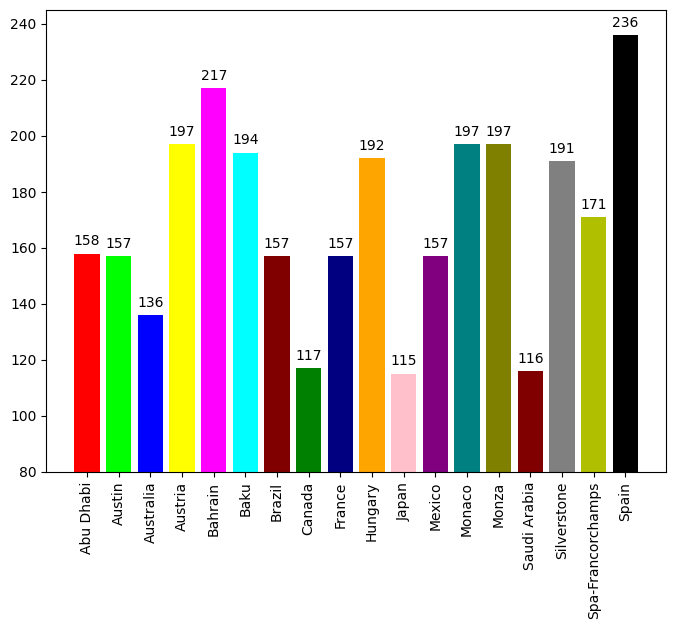

In [17]:
circ_freq = dict(Counter(df['Track']))
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(circ_freq.keys(), circ_freq.values(), color=color_circ.values())
plt.xticks(rotation=90);
rects = ax.patches
for rect, label in zip(rects, circ_freq.values()):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 2, label, ha="center", va="bottom"
    )
plt.ylim(80, 245)

C:\Users\Davi\AppData\Local\Temp\ipykernel_14688\653233679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='magma')


<Axes: >

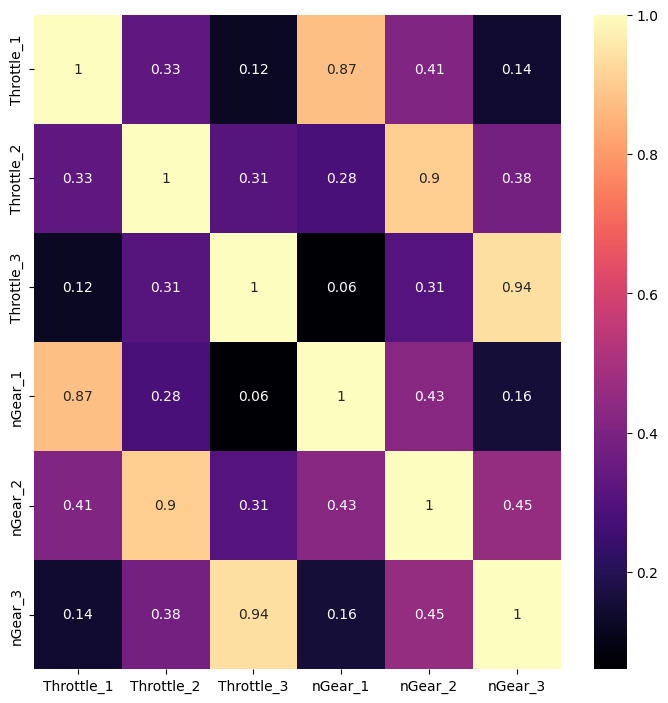

In [18]:
plt.subplots(figsize=(8.5,8.5))
sns.heatmap(df.corr(), annot=True, cmap='magma')

We can see that correlation of each sector in different features is high, so we can reaffirm that the data is not very spread out.

In [19]:
all_info_mean = df.groupby('Track').mean()
all_info_mean

,Throttle_1,Throttle_2,Throttle_3,nGear_1,nGear_2,nGear_3
Circuit,,,,,,
Abu Dhabi,86.686155,70.962693,57.776759,6.187834,5.583968,4.647978
Austin,73.137053,67.203318,58.939442,5.848538,5.380166,4.461419
Australia,74.619934,86.999994,73.592560,5.811846,6.592697,5.678381
Austria,84.167066,65.538868,78.907921,6.639772,5.293019,6.253099
Bahrain,71.446963,65.862484,73.482379,5.667558,4.960400,5.671765
Baku,64.178725,57.092000,91.274163,5.081507,4.294454,6.915720
Brazil,76.355944,57.098354,83.028120,6.170161,4.778232,6.196747
Canada,57.201526,69.522205,72.163997,4.631126,5.288431,5.651579
France,58.913024,79.561380,66.358859,5.475444,5.951882,5.559626


In [20]:
th1_seq = all_info_mean['Throttle_1'].sort_values(ascending=True)
th2_seq = all_info_mean['Throttle_2'].sort_values(ascending=True)
th3_seq = all_info_mean['Throttle_3'].sort_values(ascending=True)

gear1_seq = all_info_mean['nGear_1'].sort_values(ascending=True)
gear2_seq = all_info_mean['nGear_2'].sort_values(ascending=True)
gear3_seq = all_info_mean['nGear_3'].sort_values(ascending=True)

In [21]:
def plot_boxplot(col_name, ylabel, seq):
    fig, ax = plt.subplots(figsize=(12,7))
    flierprops = dict(marker='o', markersize=4.5)
    new_color = [color_circ[circuit] for circuit in seq.index]
    bp = ax.boxplot([df[df['Circuit'] == circuit][col_name] for circuit in seq.index],
            labels=seq.index, 
            flierprops=flierprops,
            patch_artist=True,
            meanline=True,
            meanprops=dict(color='#10FF00'),
            showmeans=True,);
    plt.xticks(rotation=25);
    plt.title(col_name, fontsize=15)
    plt.ylabel(ylabel)

    for i, patch in enumerate(bp['boxes']):
        patch.set(facecolor=new_color[i])

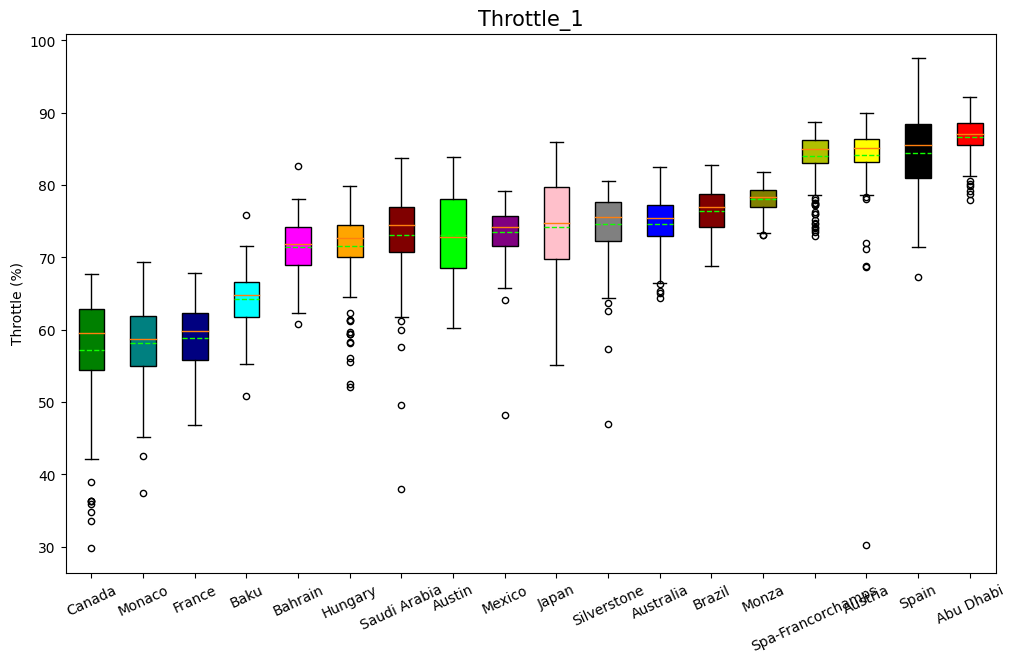

In [23]:
plot_boxplot('Throttle_1', 'Throttle (%)', th1_seq)

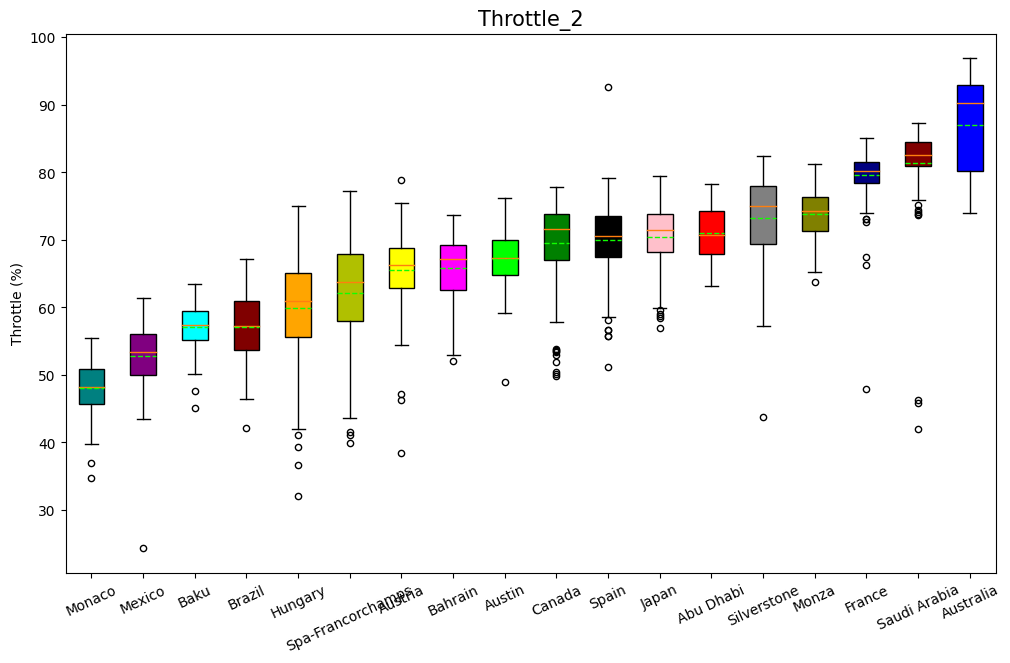

In [24]:
plot_boxplot('Throttle_2', 'Throttle (%)', th2_seq)

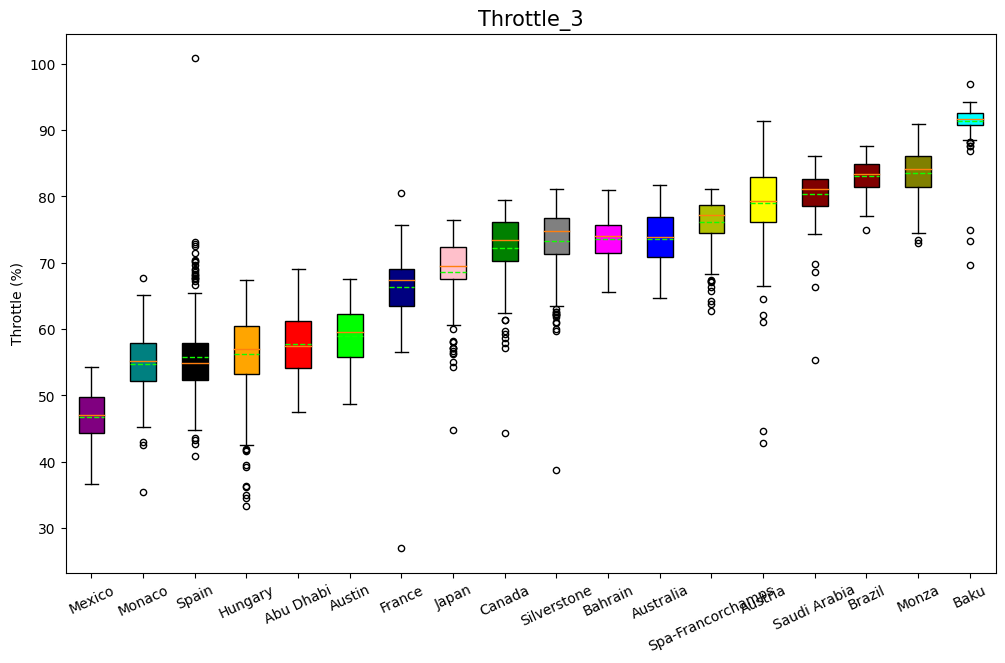

In [25]:
plot_boxplot('Throttle_3', 'Throttle (%)', th3_seq)

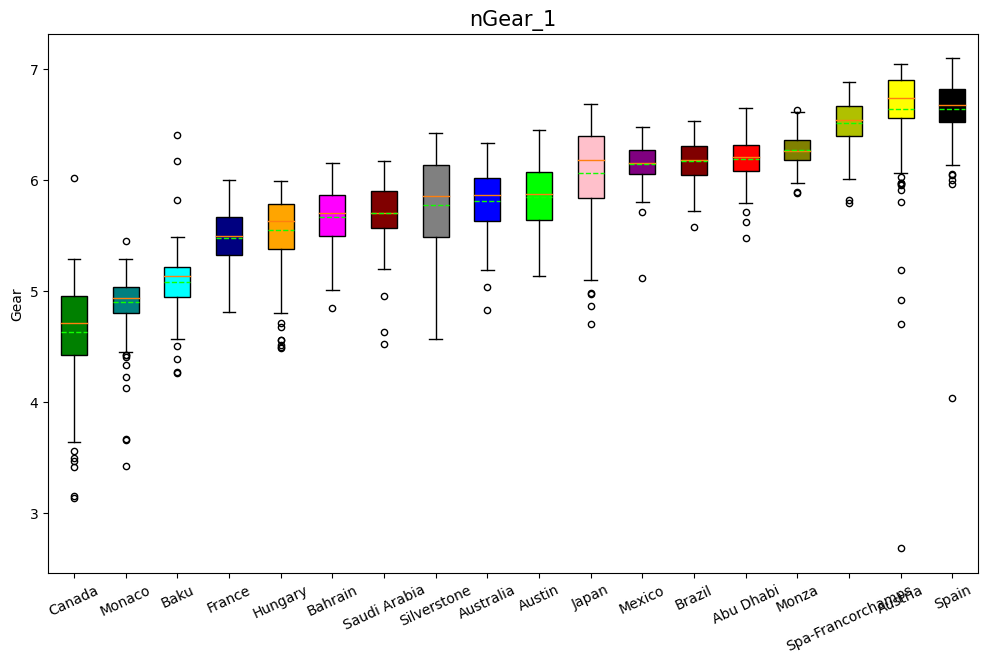

In [26]:
plot_boxplot('nGear_1', 'Gear', gear1_seq)

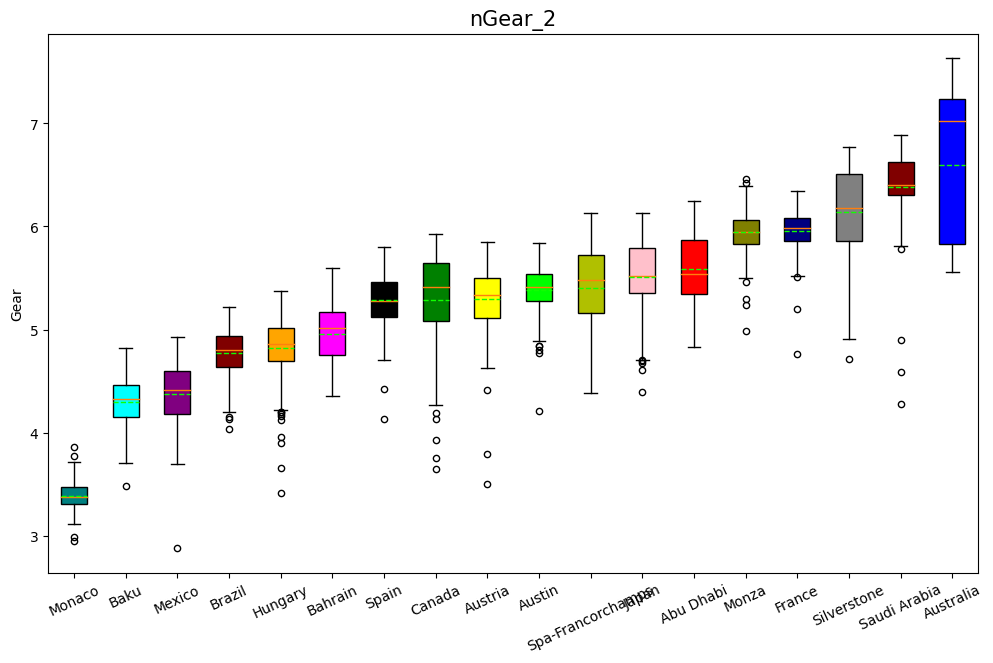

In [27]:
plot_boxplot('nGear_2', 'Gear', gear2_seq)

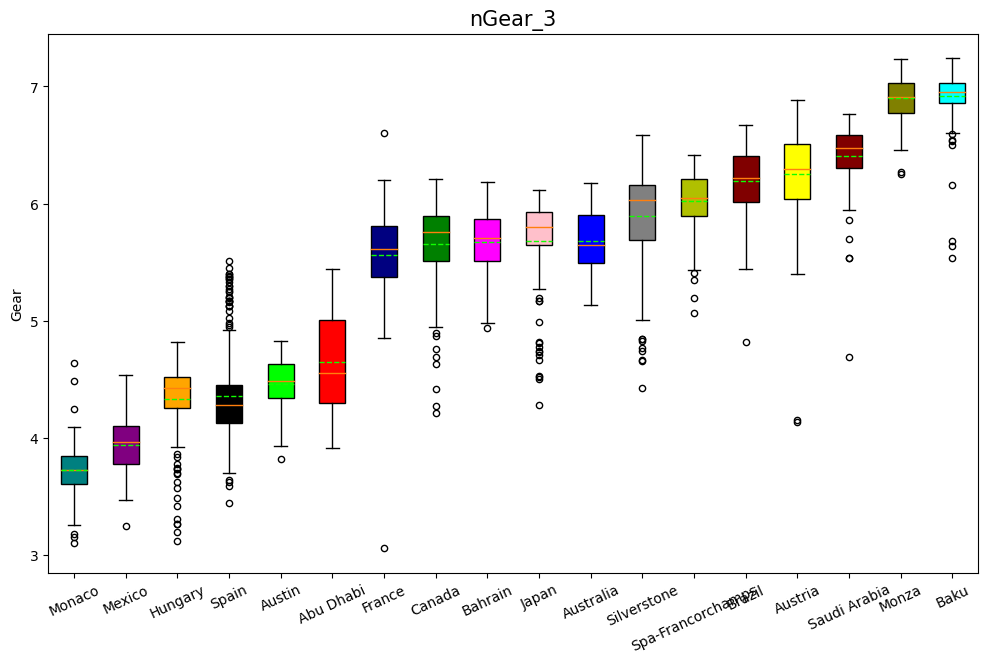

In [28]:
plot_boxplot('nGear_3', 'Gear', gear3_seq)